### Resnet Classification Model
* I Built a pretrained Resnet18 Model. 
* This model used all my selected individuals for the Face Detection Model.
* I had a total of 11 volunteers and my dog for my Face Detection Model Project.
* The data structure contained a main folder followed by subfolders that contained individual images.
### Resnet Model Folder Structure

```text
my_test/
├── Angela/
│   └── Angela1.jpg
├── Classmate/
│   └── Classmate1.jpg
├── Facemask/
│   └── facemask1.jpg
├── Giuliana/
│   └── Giuliana1.jpg
├── Honey/
│   └── Honey1.jpg
├── Javier/
│   └── Javier1.jpg
├── John/
│   └── John1.jpg
├── Maite/
│   └── Maite1.jpg
├── Mike/
│   └── Mike1.jpg
├── Ron/
│   └── Ron1.jpg
├── Shanti/
│   └── Shanti1.jpg
├── Tom/
│   └── Tom1.jpg
├── Vilma/
│   └── Vilma1.jpg
└── Will/
    └── Will1.jpg

### Test Model Process
* We can see from the photos how the image class looks.
* Images need to go through transformations depending on which image classification model you use.
* For instnace, we can see how my dog Shanti looks before & after the image transformations.
* To prepare the data for the Resnet18 model I used a dataset class that came from [jetson_nano_getting_started_with_ai](https://github.com/JJMats/jetson_nano_getting_started_with_ai/blob/master/classification/dataset.py)
* The trainloader| will use the image transformations and batch size to preprocess the data for the Resnet model|| train_loader = torch.utils.data.DataLoader(datasets, batch_size=BATCH_SIZE, shuffle=True)
* In dataset.annotations the image structure is stores as {'image_path': 'my_test\\facemask\\face.18.jpg', 'category_index': 0, 'category': 'Angela'}
* Using the dataset.count we can see the following image counts
### Image Count per Individual

| Name      | Number of Images |
|-----------|----------------|
| Angela    | 120            |
| Classmate | 120            |
| Giuliana  | 144            |
| Javier    | 120            |
| John      | 120            |
| Maite     | 120            |
| Mike      | 120            |
| Ron       | 120            |
| Shanti    | 146            |
| Tom       | 120            |
| Vilma     | 120            |
| Will      | 120            |

### Building the ResNet Model Preprocessing
* **Image Classification Pipeline:**  
  Set up the pipeline and load the necessary transformations for the pretrained ResNet18 model.
* **Transformations:**  
  The transformations perform the following tasks:
  * **Augmentation:** Randomly adjust image properties (brightness, contrast, saturation, hue).
  * **Resizing:** Resize images to a consistent size (e.g., 224x224).
  * **Conversion:** Convert images to tensors.
  * **Normalization:** Normalize the tensor values using the appropriate mean and standard deviation.
* **Dataset Creation:**  
  Create a dataset object using the `ImageClassificationDataset` class by providing:
  * The main directory.
  * The list of categories.
  * The transformation pipeline.  
  In the dataset’s `__getitem__` method, each image is automatically transformed when accessed.

  ```python
  train_loader = torch.utils.data.DataLoader(datasets, batch_size=BATCH_SIZE, shuffle=True)

### Training Loop & Model Saving

* **Tracking Metrics:**  
  - Initialize lists (`train_losses` and `train_accuracies`) to record the average loss and accuracy for each epoch.

* **Training Loop:**  
  - Set the model to training mode with `model.train()`.
  - Loop through each epoch:
    - Print the current epoch.
    - Initialize counters for total loss, error count, total samples, batch number, and correct predictions.
    - For each batch in `train_loader`:
      - Print the batch number.
      - Move images and labels to the specified device.
      - Zero out the gradients.
      - Perform a forward pass to obtain model outputs.
      - Calculate the loss using cross-entropy and perform backpropagation.
      - Update model parameters with the optimizer.
      - Compute predictions and update accuracy metrics.
      - Print the batch-level loss and training accuracy.
    - After processing all batches, calculate the average loss and training accuracy for the epoch.
    - Append these metrics for later analysis.

* **Model Saving:**  
  - Save the trained model's state dictionary to a file using `torch.save()`.
  - Print a confirmation message once the model is saved.

### Resnet Model Results
* The model hits 100% accuracy at 3 epochs
* I decided to stop the model training process after 3 epochs due to no improvement in the model
* With such high accuracy the model will suffer from overfitting on new never before seen images
* The model does well at the current photo of an individual but any change in apperance or time the model will suffer from predicting an individual
* For instance, looking at the results from Training Loss & Accuracy we can see how after 1 epochs loss is dramatically decreased and accuracy is close to 100%
* We can see that the model is doing a good job and predicting labels from test examples, but even though they were withheld from the training data they resemble the same videos


### Results from Training Loss & Accuracy

<img src="model_acc.jpg" alt="Sample Image" width="1000" height="600">


<img src="mike_pred.jpg" alt="Sample Image" width="1000" height="600">

### Testing Accuracy on 20 images from test_folder
* For each individual I withheld 20 images and placed them in a test_folder
* Though, these images can from the same training data from the videos
* We can see the model was perfect, and not misclasfying anyone
* This is concerning becuase the model has learned to well from the trainingdata
* It will not generalize well if an individual changes apperance from their training video
* For instance, if an individual adds glasses, or grows out their hair or grows a beard the model will have a hard time classifying that individual correctly 

### Confusion Matrix | ROC Results from holdout data

<img src="class_results.jpg" alt="Sample Image" width="1000" height="600">
<img src="foc_results.jpg" alt="Sample Image" width="1000" height="600">

### Additional Images Results
* I added in a wide range of images for the following individuals :Vilma, Mattie, John, Giuliana & John
* I had access to images where the individuals apperance differed.
* We can see the model is overfitting on these new images
* The model is now only 82% accurate
* Looking at the confusion Matrix & Roc Curve we can see an increase in false predications

### Results From additional images 
<img src="class_error.jpg" alt="Sample Image" width="1000" height="600">


<img src="con_error.jpg" alt="Sample Image" width="1000" height="600">
<img src="foc_error.jpg" alt="Sample Image" width="1000" height="600">

In [20]:
import os
from dataset import ImageClassificationDataset
import glob
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from dataset import ImageClassificationDataset
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
import cv2
from PIL import Image
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from IPython.display import Image, display
from PIL import Image
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize







In [5]:
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(torch.cuda.current_device())
    print(f"My GPU is working! Device: {gpu_name}")
    gif_url ='https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExYWFiMWQ4ZXoxYmd0aXlqbGtyeHc5ZXE1dzVhbGx2dDhndnh1aWt0ciZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/RhEvCHIeZAZ6E/giphy.gif'
    display(Image(url=gif_url, width=300))
else:
    print("No GPU available. Running on CPU.")

My GPU is working! Device: NVIDIA GeForce RTX 3080 Ti Laptop GPU


In [2]:
master_folder = "face_project"
# Loop through each item in the master folder
for subfolder in os.listdir(master_folder):
    subfolder_path = os.path.join(master_folder, subfolder)
    # Check if the item is a directory (subfolder)
    if os.path.isdir(subfolder_path):
        # Count image files with common image extensions
        image_files = [f for f in os.listdir(subfolder_path)
                       if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
        print(f"{subfolder}: {len(image_files)} images")

angela: 120 images
classmate: 120 images
giuliana: 144 images
javier: 120 images
john: 120 images
maite: 120 images
mike: 120 images
ron: 120 images
shanti: 146 images
tom: 120 images
vilma: 120 images
will: 120 images


['angela', 'classmate', 'giuliana', 'javier', 'john', 'maite', 'mike', 'ron', 'shanti', 'tom', 'vilma', 'will']


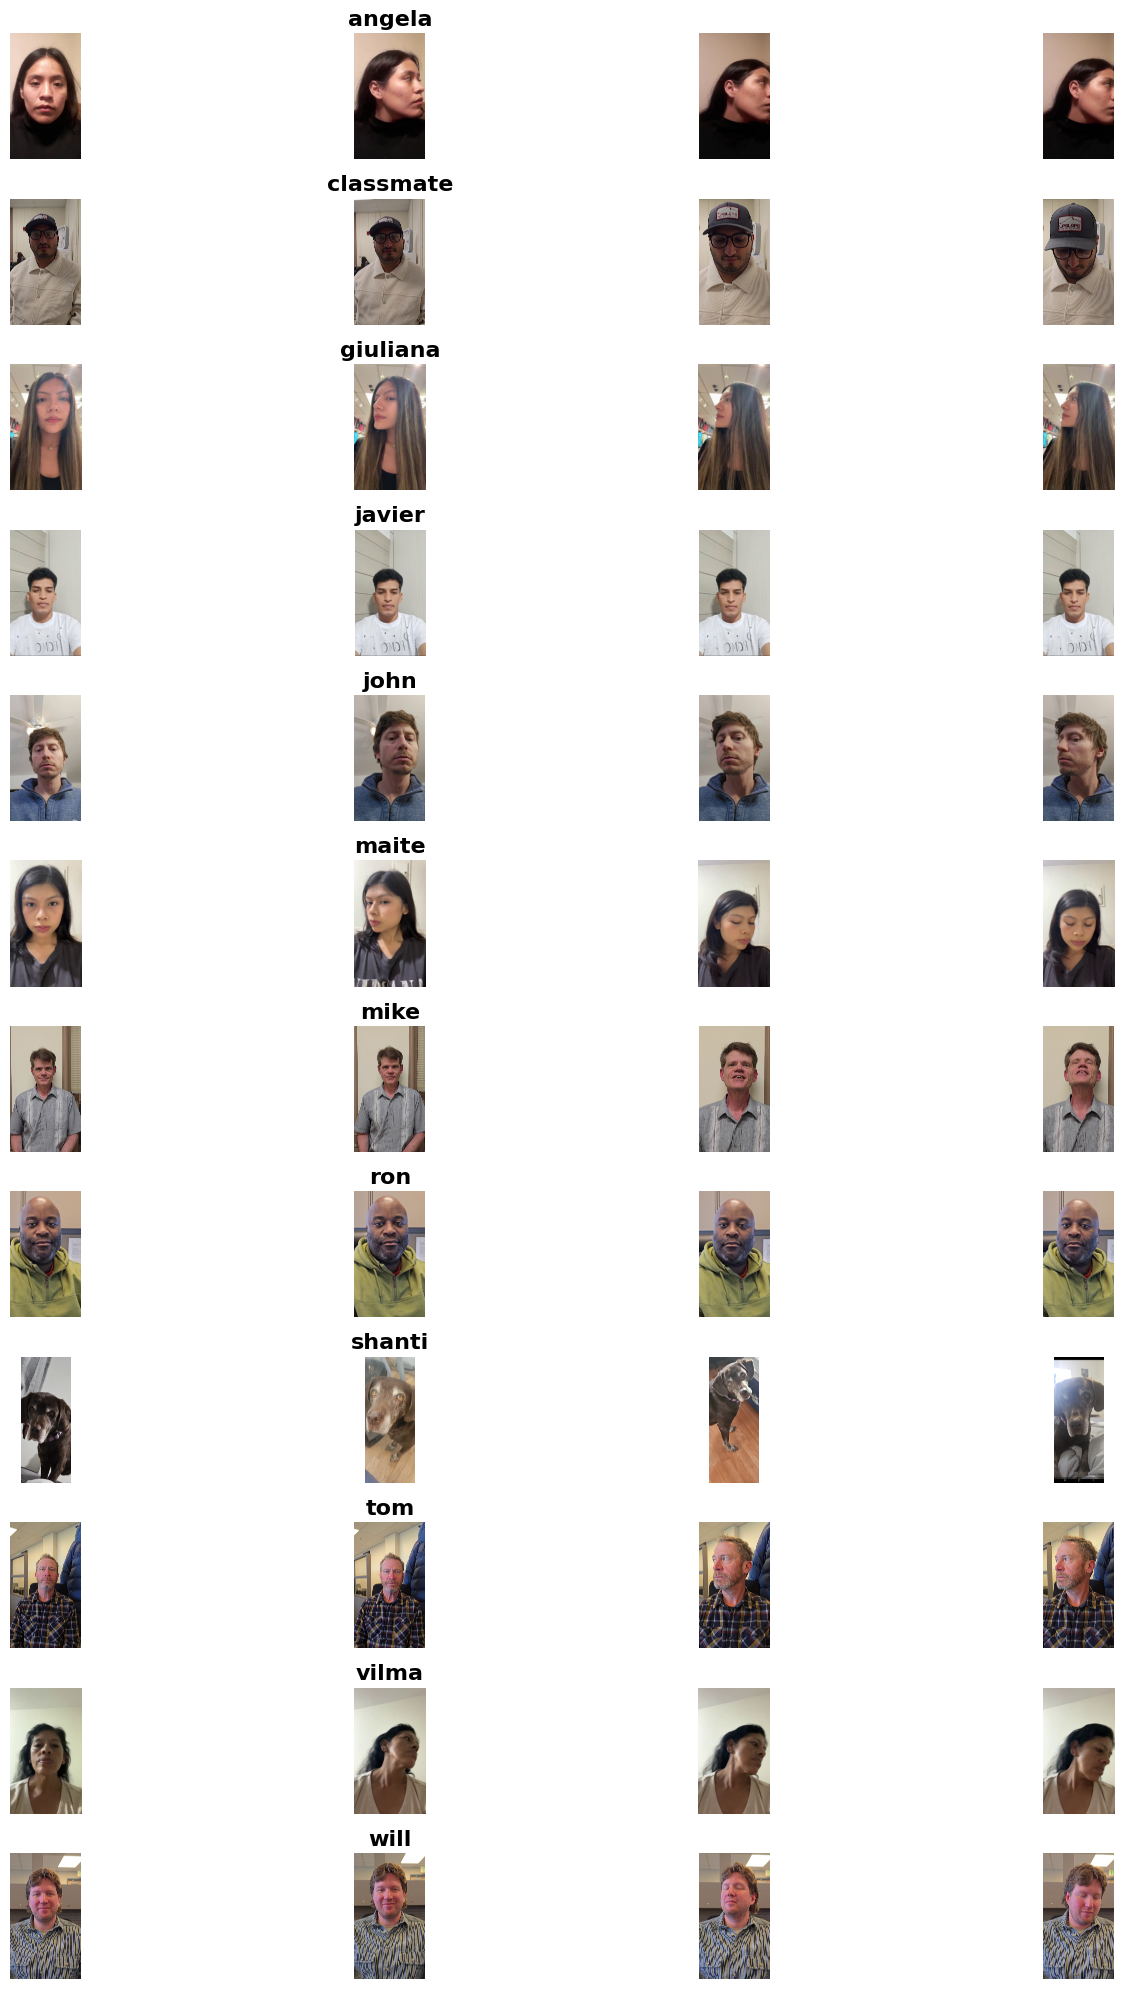

In [3]:
names = ["angela", "classmate", "giuliana", "javier", "john", "maite", "mike", "ron", "shanti", "tom", "vilma", "will"]
names_sorted = sorted(names)
print(names_sorted)
base_folder = "face_project"
subfolders = names_sorted
fig, axes = plt.subplots(nrows=len(subfolders), ncols=4, figsize=(16, 20))
for row_idx, folder in enumerate(subfolders):
    folder_path = os.path.join(base_folder, folder)
    image_files = sorted(glob.glob(os.path.join(folder_path, '*.jpg')))
    axes[row_idx, 1].set_title(folder, fontsize=16, weight='bold')
    for col_idx in range(4):
        ax = axes[row_idx, col_idx]
        ax.axis('off')  
        if col_idx < len(image_files):
            img = plt.imread(image_files[col_idx])
            ax.imshow(img)
        else:
            ax.text(0.5, 0.5, 'No Image', fontsize=12, ha='center', va='center', color='red')
plt.tight_layout()
plt.show()

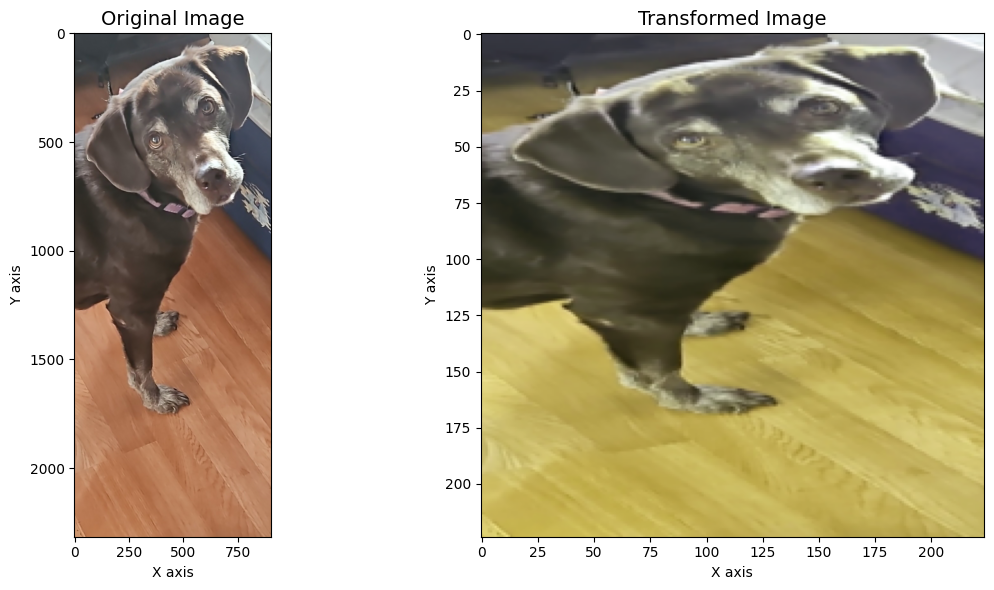

In [ ]:
TRANSFORMS = transforms.Compose([
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),  # Augmentation: brightness, contrast, saturation, hue
    transforms.Resize((224, 224)),               # Resize images to 224x224 pixels
    transforms.ToTensor(),                       # Convert image to tensor with shape [C, H, W] and values in [0, 1]
    transforms.Normalize([0.485, 0.456, 0.406],   # Normalize channels with mean
                         [0.229, 0.224, 0.225])   # ...and standard deviation
])
def denormalize(tensor, mean, std):
    """
    Reverse the normalization so the image can be displayed correctly.
    """
    # Convert mean and std to tensors (and reshape for broadcasting)
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    # Reverse normalization: (x * std) + mean
    return tensor * std + mean
sample_image_path = "face_project/shanti/Screenshot_20250127_114225_Gallery.jpg"
img = Image.open(sample_image_path).convert("RGB")
transformed_tensor = TRANSFORMS(img)
denorm_tensor = denormalize(transformed_tensor, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# Convert tensor to numpy array and rearrange dimensions from [C, H, W] to [H, W, C]
denorm_np = denorm_tensor.numpy().transpose(1, 2, 0)
denorm_np = np.clip(denorm_np, 0, 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(img)
ax1.set_title("Original Image", fontsize=14)
ax1.set_xlabel("X axis")
ax1.set_ylabel("Y axis")
ax2.imshow(denorm_np)
ax2.set_title("Transformed Image", fontsize=14)
ax2.set_xlabel("X axis")
ax2.set_ylabel("Y axis")
plt.tight_layout()
plt.show()

In [10]:
names = ["angela", "classmate", "giuliana", "javier", "john", "maite", "mike", "ron", "shanti", "tom", "vilma", "will"]
names_sorted = sorted(names)
print(names_sorted)
TASK='face_project'
CATEGORIES=names_sorted
datasets =ImageClassificationDataset(TASK,CATEGORIES, TRANSFORMS)

['angela', 'classmate', 'giuliana', 'javier', 'john', 'maite', 'mike', 'ron', 'shanti', 'tom', 'vilma', 'will']


In [11]:
for category in CATEGORIES:
    count = 0
    for annotation in datasets.annotations:
        if annotation['category'] == category:
            print(annotation)
            count += 1
            if count == 3:
                break

{'image_path': 'face_project\\angela\\Angela_1.jpg', 'category_index': 0, 'category': 'angela'}
{'image_path': 'face_project\\angela\\Angela_10.jpg', 'category_index': 0, 'category': 'angela'}
{'image_path': 'face_project\\angela\\Angela_100.jpg', 'category_index': 0, 'category': 'angela'}
{'image_path': 'face_project\\classmate\\classmate_1.jpg', 'category_index': 1, 'category': 'classmate'}
{'image_path': 'face_project\\classmate\\classmate_10.jpg', 'category_index': 1, 'category': 'classmate'}
{'image_path': 'face_project\\classmate\\classmate_100.jpg', 'category_index': 1, 'category': 'classmate'}
{'image_path': 'face_project\\giuliana\\Giuliana_1.jpg', 'category_index': 2, 'category': 'giuliana'}
{'image_path': 'face_project\\giuliana\\Giuliana_10.jpg', 'category_index': 2, 'category': 'giuliana'}
{'image_path': 'face_project\\giuliana\\Giuliana_100.jpg', 'category_index': 2, 'category': 'giuliana'}
{'image_path': 'face_project\\javier\\Javier_1.jpg', 'category_index': 3, 'categor

In [12]:
for category in CATEGORIES:
    count = datasets.get_count(category)
    print(f"{category}: {count}")

angela: 120
classmate: 120
giuliana: 144
javier: 120
john: 120
maite: 120
mike: 120
ron: 120
shanti: 146
tom: 120
vilma: 120
will: 120


In [13]:
TRANSFORMS = transforms.Compose([
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),  # Augmentation
    transforms.Resize((224, 224)),               # Resize images
    transforms.ToTensor(),                       # Convert images to tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize images
])
names = ["angela", "classmate", "giuliana", "javier", "john", "maite", "mike", "ron", "shanti", "tom", "vilma", "will"]
names_sorted = sorted(names)
print(names_sorted)
TASK='face_project'
CATEGORIES=names_sorted
datasets =ImageClassificationDataset(TASK,CATEGORIES, TRANSFORMS)
# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load pretrained ResNet18 model and modify the last layer
model = torchvision.models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(512, len(datasets.categories))  # Adjust output layer for categories
model = model.to(device)
# Hyperparameters
BATCH_SIZE = 16  # Increased batch size for better stability
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)  # Lower learning rate
epochs = 3    # set to 3 after review the model doesn't improve after 3 epochs also takes forever :(  need the 5090 GPU :)  
# DataLoader setup
train_loader = DataLoader(datasets, batch_size=BATCH_SIZE, shuffle=True)

['angela', 'classmate', 'giuliana', 'javier', 'john', 'maite', 'mike', 'ron', 'shanti', 'tom', 'vilma', 'will']


c:\Users\johnm\anaconda3\envs\youtube_object\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\johnm\anaconda3\envs\youtube_object\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
# Track training progress
train_losses = []
train_accuracies = []
# Training loop
model.train()  # Set model to training mode
for epoch in range(epochs):
    print("this is epoch", epoch)
    sum_loss = 0.0
    error_count = 0.0
    total_samples = 0
    batch_num = 1
    correct_train = 0  # For tracking correct predictions
    for images, labels in iter(train_loader):
        print(f"This is batch {batch_num}")
        images = images.to(device)
        labels = labels.to(device)
        # Zero gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(images)
        # Loss calculation
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        # Optimizer step
        optimizer.step()
        # Accuracy calculation
        predictions = outputs.argmax(1)
        error_count += (predictions != labels).sum().item()
        correct_train += (predictions == labels).sum().item()
        total_samples += labels.size(0)
        sum_loss += loss.item()
        # Print batch stats
        print(f"Batch {batch_num}, Loss: {loss.item()}, Training Accuracy: {100 * correct_train / total_samples:.4f}%")
        batch_num += 1
    # Track the average loss and accuracy for the epoch
    epoch_train_accuracy = 100 * correct_train / total_samples
    print(f"Epoch {epoch + 1} completed. Avg Loss: {sum_loss / len(train_loader):.4f}, Training Accuracy: {epoch_train_accuracy:.4f}%")
    # Append stats for plotting later
    train_losses.append(sum_loss / len(train_loader))
    train_accuracies.append(epoch_train_accuracy)
# Save the trained model
torch.save(model.state_dict(), 'jm_resnet18.pth')
print("Model saved as 'jm_resnet18.pth'")

this is epoch 0
This is batch 1
Batch 1, Loss: 2.5942933559417725, Training Accuracy: 18.7500%
This is batch 2
Batch 2, Loss: 2.077742338180542, Training Accuracy: 21.8750%
This is batch 3
Batch 3, Loss: 2.4102845191955566, Training Accuracy: 16.6667%
This is batch 4
Batch 4, Loss: 1.510114312171936, Training Accuracy: 31.2500%
This is batch 5
Batch 5, Loss: 1.6539206504821777, Training Accuracy: 38.7500%
This is batch 6
Batch 6, Loss: 1.014235258102417, Training Accuracy: 47.9167%
This is batch 7
Batch 7, Loss: 0.8966965675354004, Training Accuracy: 55.3571%
This is batch 8
Batch 8, Loss: 0.6648796796798706, Training Accuracy: 60.9375%
This is batch 9
Batch 9, Loss: 0.7804191708564758, Training Accuracy: 65.2778%
This is batch 10
Batch 10, Loss: 0.7233555912971497, Training Accuracy: 68.1250%
This is batch 11
Batch 11, Loss: 0.49597758054733276, Training Accuracy: 70.4545%
This is batch 12
Batch 12, Loss: 0.44787949323654175, Training Accuracy: 72.9167%
This is batch 13
Batch 13, Loss

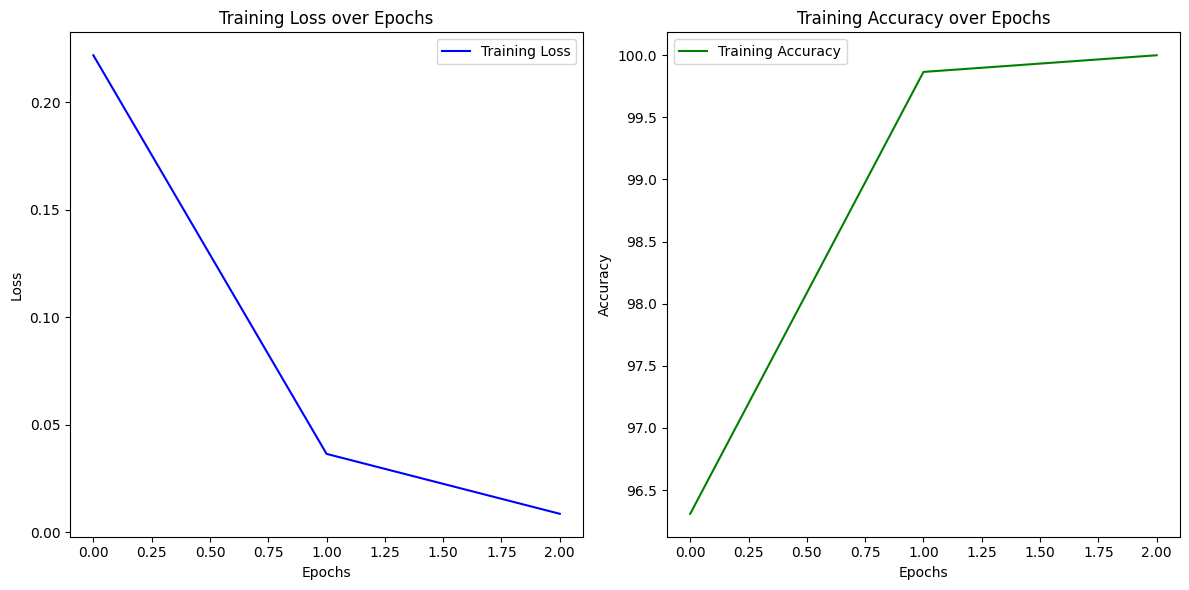

In [15]:
# Plotting the loss and accuracy curves over epochs
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label="Training Loss", color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label="Training Accuracy", color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load the pretrained ResNet18 model and modify the last layer (to match the training model)
model = torchvision.models.resnet18(pretrained=False)  # Don't load the pretrained weights here
model.fc = torch.nn.Linear(512, len(datasets.categories))  # Adjust output layer for categories
model.load_state_dict(torch.load('jm_resnet18.pth'))  # Load the saved weights
model.to(device)
model.eval()  # Set model to evaluation mode

c:\Users\johnm\anaconda3\envs\youtube_object\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Transformation pipeline (same as during training)
TRANSFORMS = transforms.Compose([
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),  # Augmentation
    transforms.Resize((224, 224)),               # Resize images
    transforms.ToTensor(),                       # Convert images to tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize images
])

# Function to unnormalize the image (Fixing the device issue)
def unnormalize_image(tensor, device):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1).to(device)  # Move mean to the correct device
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1).to(device)  # Move std to the correct device
    return tensor * std + mean

def predict_image(image_path):
    # Load the image using OpenCV (which reads in BGR format)
    image = cv2.imread(image_path)
    # Convert the BGR image to RGB for correct display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Apply transformations
    pil_image = Image.fromarray(image_rgb)  # Convert the image to PIL format
    image_tensor = TRANSFORMS(pil_image).unsqueeze(0).to(device)  # Apply transforms and move to device
    # Get model predictions
    with torch.no_grad():  # No need to compute gradients during inference
        outputs = model(image_tensor)
        probabilities = F.softmax(outputs, dim=1)
        _, predicted_class = torch.max(probabilities, 1)
    predicted_label = datasets.categories[predicted_class.item()]  # Get the predicted label
    # Display the image using Matplotlib
    plt.imshow(image_rgb)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')  # Hide axes
    plt.show()
    print(f"Predicted label: {predicted_label}")
    return predicted_label

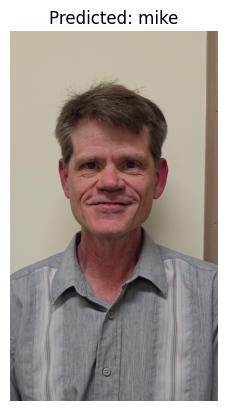

Predicted label: mike


'mike'

In [ ]:
# Example usage: Predict a new image
image_path = "C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images/mike_117.jpg"
predict_image(image_path)

C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Angela_125.jpg


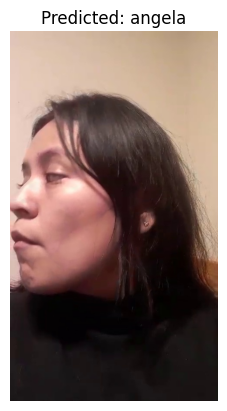

Predicted label: angela
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Angela_133.jpg


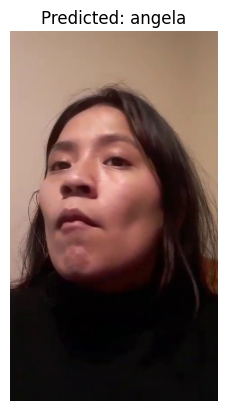

Predicted label: angela
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Angela_135.jpg


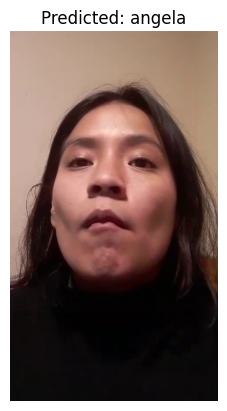

Predicted label: angela
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\classmate_123.jpg


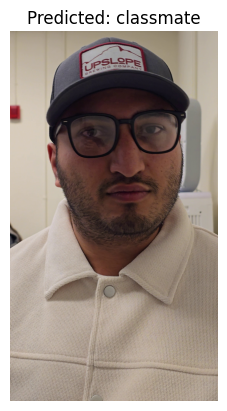

Predicted label: classmate
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\classmate_139.jpg


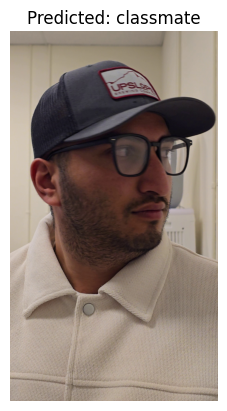

Predicted label: classmate
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\classmate_140.jpg


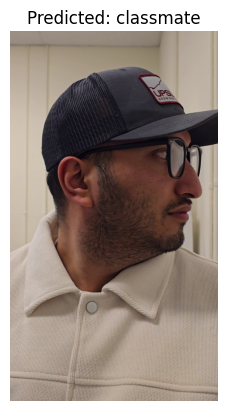

Predicted label: classmate
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Giuliana_22.jpg


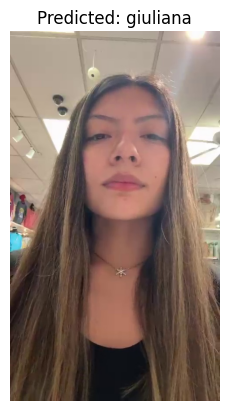

Predicted label: giuliana
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Giuliana_48.jpg


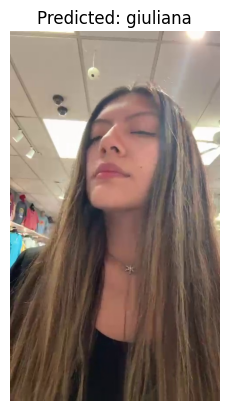

Predicted label: giuliana
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Javier_101.jpg


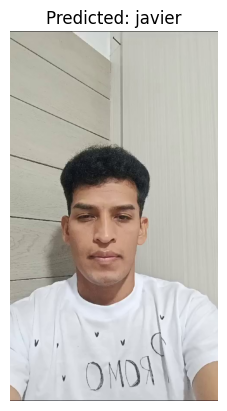

Predicted label: javier
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Javier_108.jpg


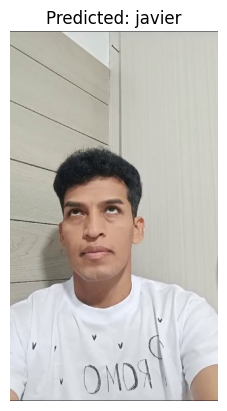

Predicted label: javier
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Javier_111.jpg


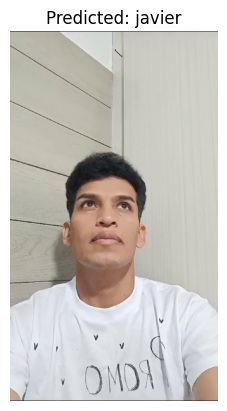

Predicted label: javier
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Javier_140.jpg


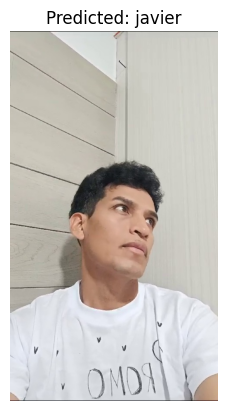

Predicted label: javier
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\john_113.jpg


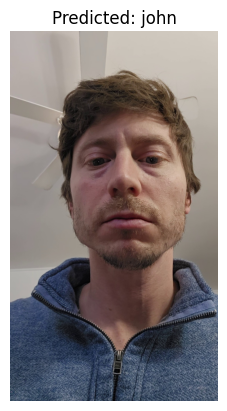

Predicted label: john
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\john_140.jpg


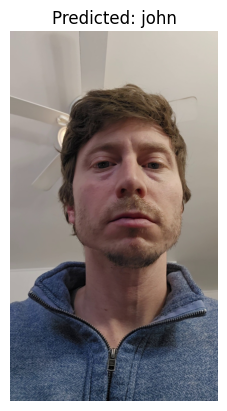

Predicted label: john
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Maite_139.jpg


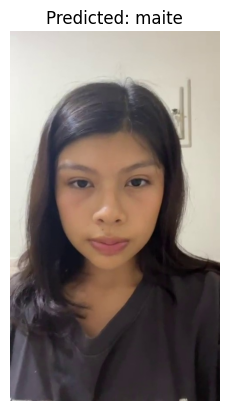

Predicted label: maite
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Maite_140.jpg


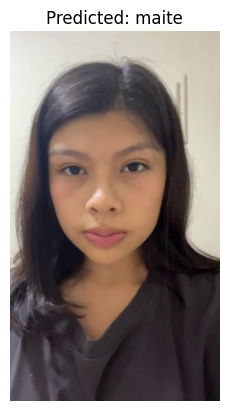

Predicted label: maite
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\mike_117.jpg


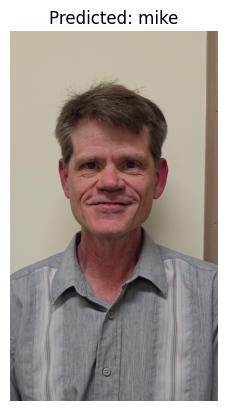

Predicted label: mike
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\mike_134.jpg


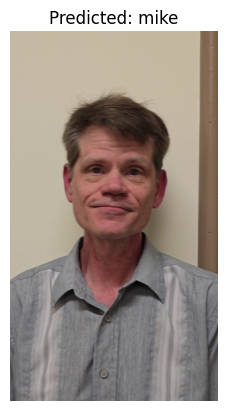

Predicted label: mike
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\mike_135.jpg


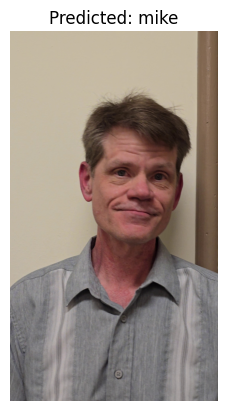

Predicted label: mike
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\ron_139.jpg


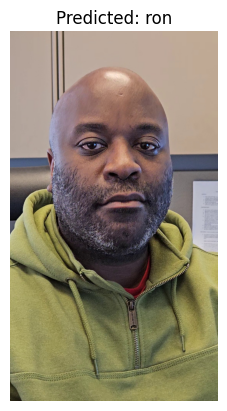

Predicted label: ron
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\ron_140.jpg


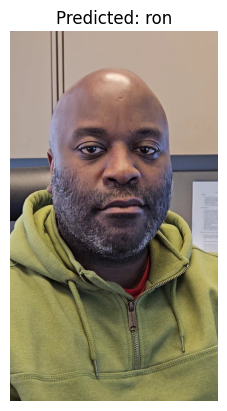

Predicted label: ron
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Screenshot_20250127_114519_Gallery.jpg


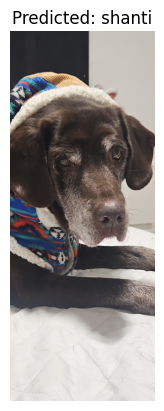

Predicted label: shanti
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Screenshot_20250127_114755_Gallery.jpg


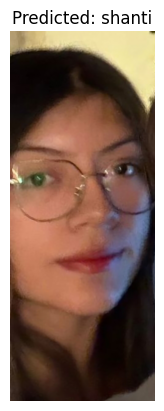

Predicted label: shanti
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Screenshot_20250127_114907_Gallery.jpg


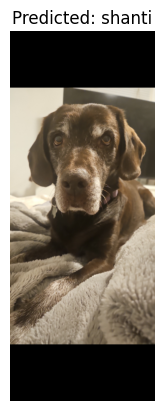

Predicted label: shanti
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\shanti_117.jpg


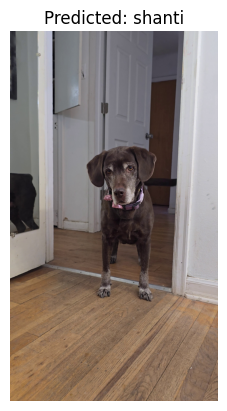

Predicted label: shanti
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\tom_139.jpg


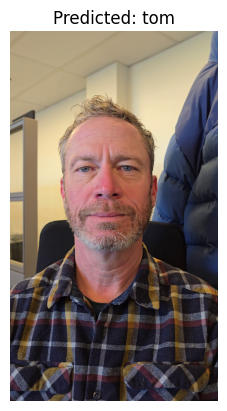

Predicted label: tom
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\tom_140.jpg


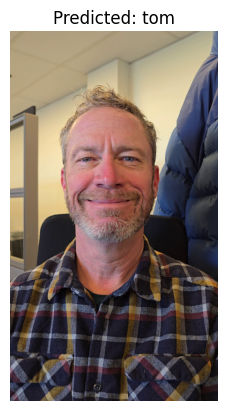

Predicted label: tom
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Vilma_128.jpg


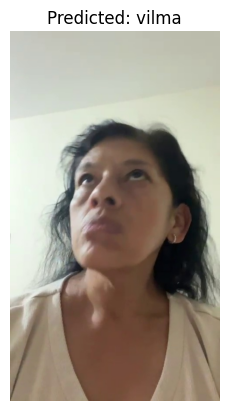

Predicted label: vilma
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\Vilma_140.jpg


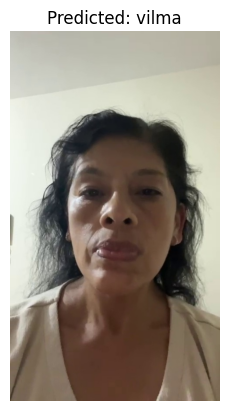

Predicted label: vilma
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\will_139.jpg


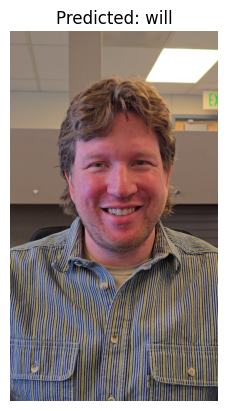

Predicted label: will
C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images\will_140.jpg


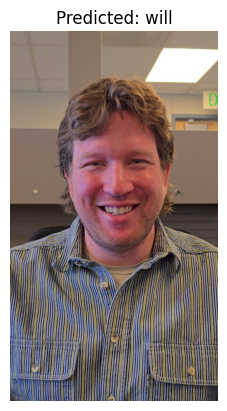

Predicted label: will


In [19]:
my_f = 'C:/Users/johnm/OneDrive/2026/capstone_project/random_test_images'
for x in os.listdir(my_f):
    ip = os.path.join(my_f, x)
    print(ip)
    predict_image(ip)

['angela', 'classmate', 'giuliana', 'javier', 'john', 'maite', 'mike', 'ron', 'shanti', 'tom', 'vilma', 'will']
Test Accuracy: 99.5833%
Test Loss: 0.0061
Misclassified Images:
face_project_test\giuliana\Screenshot_20250127_114755_Gallery.jpg


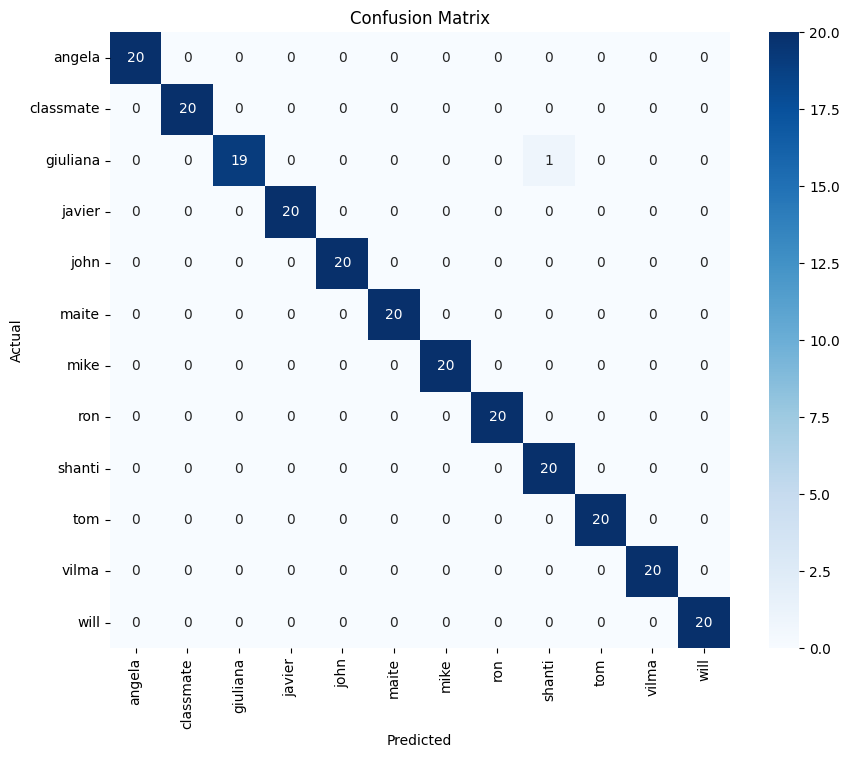

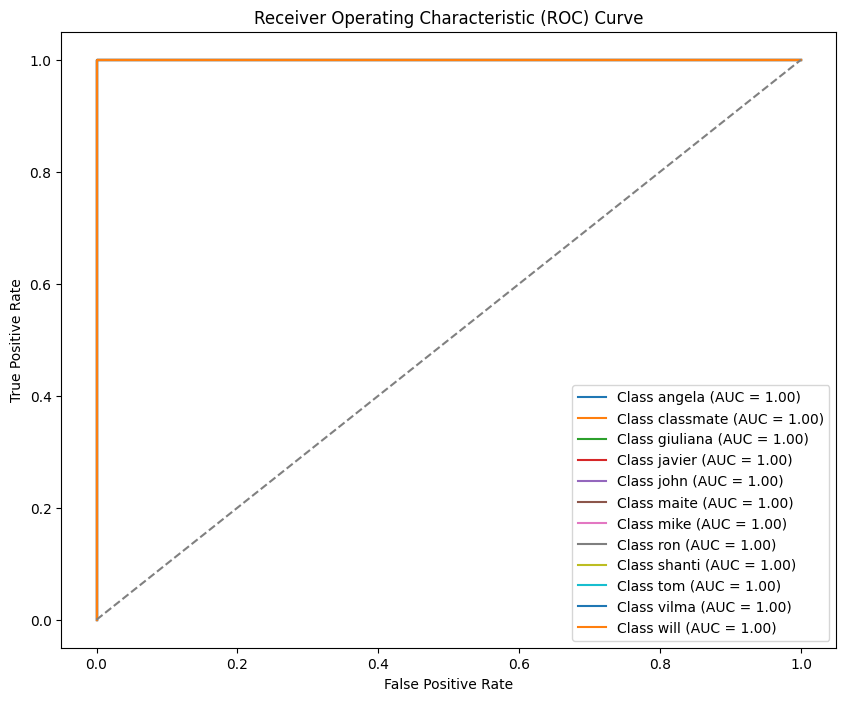

In [21]:
names = ["angela", "classmate", "giuliana", "javier", "john", "maite", "mike", "ron", "shanti", "tom", "vilma", "will"]
names_sorted = sorted(names)
print(names_sorted)
TASK='face_project'
CATEGORIES=names_sorted
# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torchvision.models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(512, len(CATEGORIES))  # Adjust for the number of categories
model.load_state_dict(torch.load('jm_resnet18.pth'))  # Load the trained weights
model.to(device)
model.eval()  # Set model to evaluation mode

# Transformation for test data (same as used during training)
TRANSFORMS = transforms.Compose([
    transforms.Resize((224, 224)),               # Resize images to match input size
    transforms.ToTensor(),                       # Convert images to tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize
])

# Load test data
test_data_path = 'face_project_test'  # Folder where the test data is stored
test_dataset = ImageClassificationDataset(test_data_path, CATEGORIES, TRANSFORMS)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Evaluation loop (loss and accuracy)
test_loss = 0.0
correct = 0
total = 0
all_preds = []
all_labels = []
all_outputs = []  # For storing raw model outputs (logits) for ROC computation
misclassified_filepaths = []  # To record file paths of misclassified images

# External index to track the overall sample position in the dataset.
current_index = 0

for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    batch_size = labels.size(0)

    with torch.no_grad():
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        test_loss += loss.item()

        # Get predictions
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += batch_size

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_outputs.append(outputs.cpu())

        # Identify misclassified images using the external index.
        # Look up the file path from test_dataset.annotations based on the current index.
        for i in range(batch_size):
            if predicted[i] != labels[i]:
                misclassified_filepaths.append(test_dataset.annotations[current_index + i]['image_path'])
    current_index += batch_size

# Calculate test accuracy and average loss
accuracy = 100 * correct / total
avg_loss = test_loss / len(test_loader)
print(f"Test Accuracy: {accuracy:.4f}%")
print(f"Test Loss: {avg_loss:.4f}")

# Print the file paths of misclassified images
print("Misclassified Images:")
for path in misclassified_filepaths:
    print(path)

# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Computation (Multi-Class)
n_classes = len(CATEGORIES)
all_labels_bin = label_binarize(all_labels, classes=range(n_classes))

# Concatenate all model outputs and compute probabilities using softmax
all_outputs_tensor = torch.cat(all_outputs, dim=0)
outputs_prob = F.softmax(all_outputs_tensor, dim=1).cpu().numpy()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], outputs_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {CATEGORIES[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

['angela', 'classmate', 'giuliana', 'javier', 'john', 'maite', 'mike', 'ron', 'shanti', 'tom', 'vilma', 'will']


c:\Users\johnm\anaconda3\envs\youtube_object\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\johnm\anaconda3\envs\youtube_object\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 82.1326%
Test Loss: 0.5521
Misclassified Images:
face_project_test_two\giuliana\Screenshot 2025-02-09 195305.jpg
face_project_test_two\giuliana\Screenshot_20250127_114755_Gallery.jpg
face_project_test_two\giuliana\Screenshot_20250209_172400_Gallery.jpg
face_project_test_two\giuliana\Screenshot_20250209_172405_Gallery.jpg
face_project_test_two\giuliana\Screenshot_20250209_172408_Gallery.jpg
face_project_test_two\giuliana\Screenshot_20250209_172645_Gallery.jpg
face_project_test_two\giuliana\Screenshot_20250209_172700_Gallery.jpg
face_project_test_two\giuliana\Screenshot_20250209_172805_Gallery.jpg
face_project_test_two\giuliana\Screenshot_20250209_172808_Gallery.jpg
face_project_test_two\giuliana\Screenshot_20250209_172814_Gallery.jpg
face_project_test_two\giuliana\Screenshot_20250209_172815_Gallery.jpg
face_project_test_two\giuliana\Screenshot_20250209_172838_Gallery.jpg
face_project_test_two\giuliana\Screenshot_20250209_173019_Gallery.jpg
face_project_test_two\giuliana\t

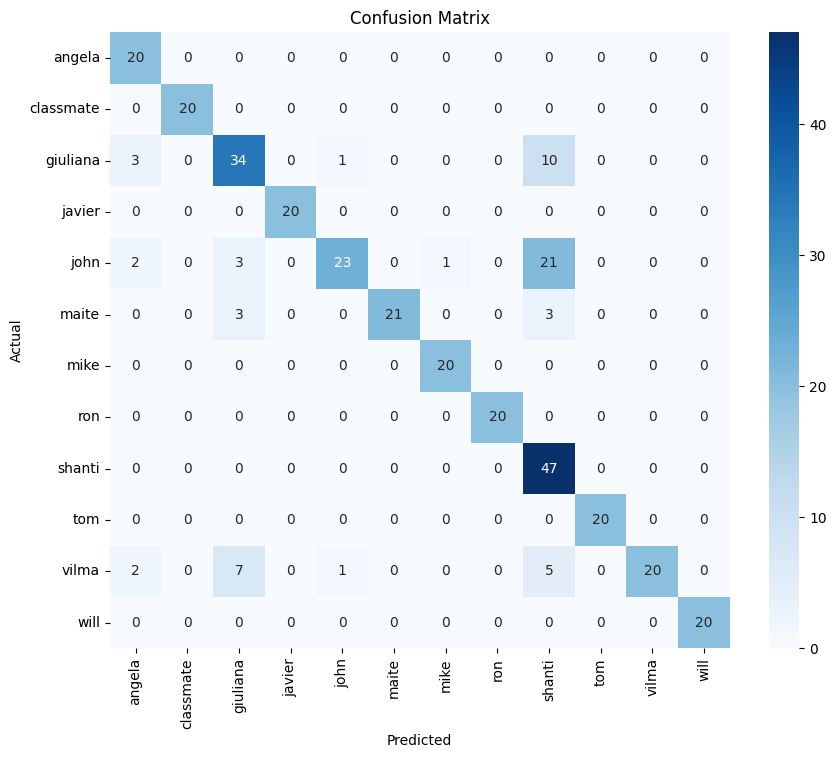

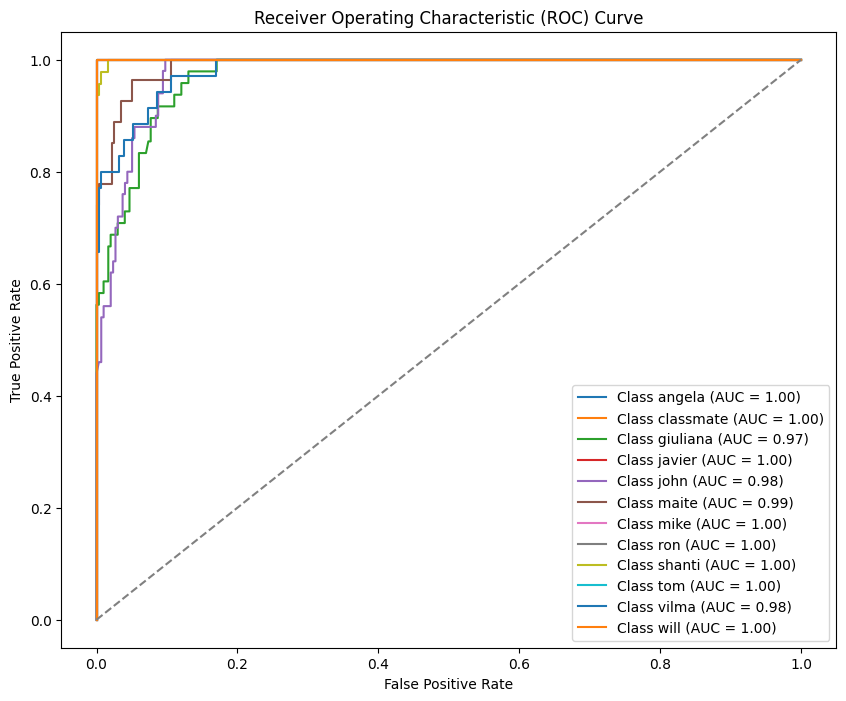

In [25]:
names = ["angela", "classmate", "giuliana", "javier", "john", "maite", "mike", "ron", "shanti", "tom", "vilma", "will"]
names_sorted = sorted(names)
print(names_sorted)
TASK='face_project_test_two'
CATEGORIES=names_sorted
# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torchvision.models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(512, len(CATEGORIES))  # Adjust for the number of categories
model.load_state_dict(torch.load('jm_resnet18.pth'))  # Load the trained weights
model.to(device)
model.eval()  # Set model to evaluation mode

# Transformation for test data (same as used during training)
TRANSFORMS = transforms.Compose([
    transforms.Resize((224, 224)),               # Resize images to match input size
    transforms.ToTensor(),                       # Convert images to tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize
])

# Load test data
test_data_path = 'face_project_test_two'  # Folder where the test data is stored
test_dataset = ImageClassificationDataset(test_data_path, CATEGORIES, TRANSFORMS)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Evaluation loop (loss and accuracy)
test_loss = 0.0
correct = 0
total = 0
all_preds = []
all_labels = []
all_outputs = []  # For storing raw model outputs (logits) for ROC computation
misclassified_filepaths = []  # To record file paths of misclassified images

# External index to track the overall sample position in the dataset.
current_index = 0

for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    batch_size = labels.size(0)

    with torch.no_grad():
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        test_loss += loss.item()

        # Get predictions
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += batch_size

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_outputs.append(outputs.cpu())

        # Identify misclassified images using the external index.
        # Look up the file path from test_dataset.annotations based on the current index.
        for i in range(batch_size):
            if predicted[i] != labels[i]:
                misclassified_filepaths.append(test_dataset.annotations[current_index + i]['image_path'])
    current_index += batch_size

# Calculate test accuracy and average loss
accuracy = 100 * correct / total
avg_loss = test_loss / len(test_loader)
print(f"Test Accuracy: {accuracy:.4f}%")
print(f"Test Loss: {avg_loss:.4f}")

# Print the file paths of misclassified images
print("Misclassified Images:")
for path in misclassified_filepaths:
    print(path)

# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Computation (Multi-Class)
n_classes = len(CATEGORIES)
all_labels_bin = label_binarize(all_labels, classes=range(n_classes))

# Concatenate all model outputs and compute probabilities using softmax
all_outputs_tensor = torch.cat(all_outputs, dim=0)
outputs_prob = F.softmax(all_outputs_tensor, dim=1).cpu().numpy()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], outputs_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {CATEGORIES[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()